In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math

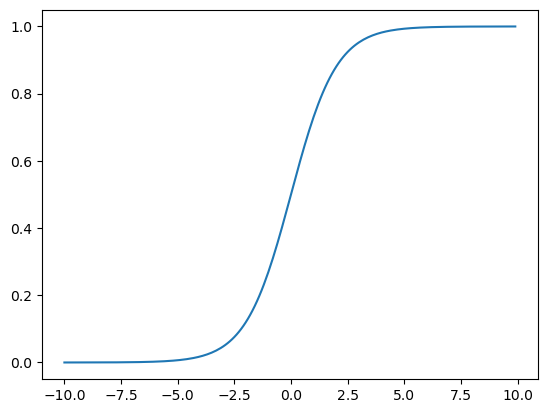

In [3]:
def sigmoid(z):
    sigmoid = 1/(1 + np.exp(-z))
    return sigmoid

z = np.arange(-10, 10, 0.1)
g = 1/(1+np.exp(-z))
plt.plot(z, g)
plt.show()

In [4]:
train_data = pd.read_csv('train_logistic.csv')
train_data.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [5]:
train_data.isnull()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
572,False,False,False,False,False,False,False,False
573,False,False,False,False,False,False,False,False
574,False,False,False,False,False,False,False,False
575,False,False,False,False,False,False,False,False


In [6]:
#clean dataset

#male = 1, female = 0
train_data['Sex'] = train_data['Sex'].replace({'male':1, 'female':0})

#remove names
if 'Name' in train_data.columns:
    train_data = train_data.drop('Name', axis=1)
train_data.head()

X_train = np.array(train_data.drop('Survived', axis=1))
y_train = np.array(train_data['Survived'])
print(X_train.shape)

(577, 6)


In [7]:
train_data.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


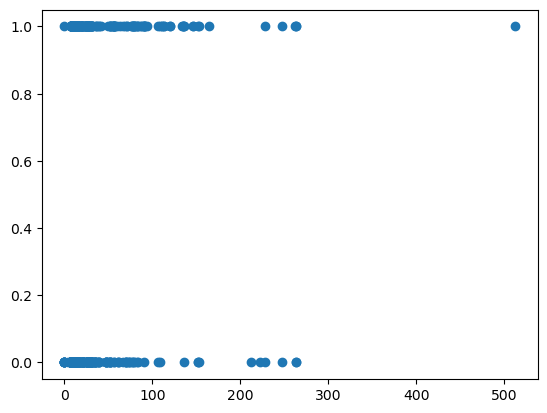

In [8]:
x = train_data['Fare']
y = train_data['Survived']
plt.scatter(x, y)

In [9]:
def loss_func(y, y_hat):
    
    loss = - y*(np.log(y_hat)) - (1-y)*(np.log(1-y_hat))
    return loss

loss_func(0, 0.6)

0.916290731874155

In [10]:
x = np.arange(0.001, 1, 0.001)
y0 = loss_func(0, x)
y1 = loss_func(1, x)
# plt.plot(x, y0)
# plt.plot(x, y1)

In [11]:
def cost_func(y, y_hat):
    m = len(y)
    cost = 0
    for i in range(m):
        
        cost += loss_func(y[i], y_hat[i])
    
    cost = cost/m
    
    return cost

In [12]:
def gradient_func(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros(n)
    dj_db = 0
    cost = 0
    y_pred = []
    for i in range(m):
        #f_wb = w.x + b
        f_wb = 0
        for j in range(n):
            f_wb += w[j] * X[i][j]
        f_wb += b
        y_hat = sigmoid(f_wb)
        
        for j in range(n):
            dj_dw[j] += (y_hat - y[i])*X[i][j]
            
        dj_db += y_hat - y[i]
        
        y_pred.append(y_hat)
    
    cost = cost_func(y, y_pred)
#         cost += cost_func(y[i], y_hat)
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_dw, dj_db, cost
X, y, w, b = np.array([[10, 20], [-10, 10]]), np.array([1, 0]), np.array([0.5, 1.5]), 1
print(f"gradient_func(X = {X}, y = {y}, w = {w}, b = {b}) = {gradient_func(X, y, w, b)}")

gradient_func(X = [[ 10  20]
 [-10  10]], y = [1 0], w = [0.5 1.5], b = 1) = (array([-4.99991649,  4.99991649]), 0.4999916492890759, 5.500008350784906)


In [15]:
def descent(X, y, w, b, l_rate, epochs):
    history = []
    for epoch in range(epochs):
        dj_dw, dj_db, cost = gradient_func(X, y, w, b)
        temp_w = w - l_rate*dj_dw
        temp_b = b - l_rate*dj_db
        w = temp_w
        b = temp_b
        history.append([epoch, [w, b], cost])
        
        if epoch%1000 == 0:
            print(history[epoch])
            
    return w, b, history

X, y, w, b, alpha, n_iter = X_train, y_train, np.zeros(X_train.shape[1]), 0., 0.005, 50000
w_out, b_out, cost_history = descent(X, y, w, b, alpha, n_iter)    

[0, [array([-1.75476603e-03, -9.79202773e-04, -1.74566724e-02, -4.24610052e-04,
       -3.89948007e-05,  5.87678899e-03]), -0.0005155979202772964], 0.6931471805599468]
[1000, [array([-0.12946312, -0.51812197, -0.03108548, -0.25616039,  0.00814013,
        0.00566528]), 0.030139504238328077], 0.7741312727015663]
[2000, [array([-0.07996941, -0.9133067 , -0.02735897, -0.32819973,  0.04933804,
        0.00566552]), 0.11280990229258829], 0.7187931432773208]
[3000, [array([-0.04185368, -1.23214124, -0.02456833, -0.36224814,  0.07221857,
        0.00543884]), 0.1952603810526465], 0.6794959371905103]
[4000, [array([-0.01843573, -1.4892222 , -0.02202155, -0.37980086,  0.08104388,
        0.00517055]), 0.275978331517562], 0.6496842167445476]
[5000, [array([-0.00543563, -1.69599689, -0.01984895, -0.38882991,  0.08128483,
        0.00491237]), 0.355565770052593], 0.6268055418603838]
[6000, [array([ 1.63965936e-04, -1.86214951e+00, -1.81008159e-02, -3.93377681e-01,
        7.67132480e-02,  4.677361

In [18]:
print(cost_history[-1])

[49999, [array([-0.49652   , -2.73625151, -0.01593259, -0.44335039, -0.03919001,
        0.02495499]), 2.89254908365882], 0.5057530646193334]


In [21]:
w1, b1 = w_out, b_out
probability_out = sigmoid(np.dot(X_train, w1) + b1)
#print(probability_out)

final_pred = []
for i in probability_out:
    if i >= 0.7:
        final_pred.append(1)
    else:
        final_pred.append(0)
# print(len(final_pred))
# print(train_data['Survived'])

accuracy = 0
for i, j in zip(final_pred, train_data['Survived']):
    if i == j:
        accuracy += 1

accuracy_percentage = (accuracy/len(final_pred))*100
print(accuracy_percentage)

79.37608318890814


[0.69314718 0.65254863 0.65239394 ... 0.50575357 0.5372092  0.50575306]


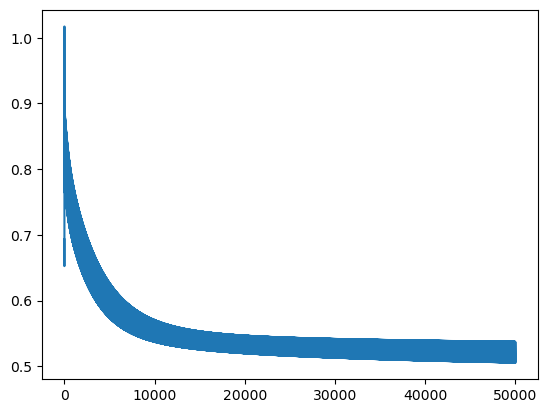

In [36]:
x = np.arange(n_iter)
y = np.array([cost_history[i][-1] for i in range(len(cost_history))])
print(y)
plt.plot(x, y)